# 7장. 군집화

* [7.1. K-평균 알고리즘 이해](#7.1.)
* [7.2. 군집 평가(Cluster Evaluation)](#7.2.)
* [7.3. 평균 이동](#7.3.)
* [7.4. GMM(Gaussian Mixture Model)](#7.4.)
* [7.5. DBSCAN](#7.5.)
* [7.6. 군집화 실습 - 고객 세그먼테이션](#7.6)

<div id='7.1.'/>

## 7.1. K-평균 알고리즘 이해

* K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.
* 다음 그림은 K-평균이 어떻게 동작하는지를 시각적으로 표현했다.

<img src="./images/pic_7_1.png" width="80%" height="80%">

* K-평균 장점
   * 일반적인 군집화에서 가장 많이 활용하는 알고리즘이다.
   * 알고리즘이 쉽고 간결하다.
* K-평균 단점
   * 거리 기반 알고리즘이므로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다. (이를 위해 PCA 차원 감소가 필요할 수도 있다)
   * 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
   * 군집 개수를 미리 설정해야 한다.
   * 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어렵다.

### 사이킷런 KMeans 클래스 소개

* sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, ...)
   * 초기화 파라미터 중 가장 중요한 것은 n_clusters 이다.
   * init은 초기에 군집 중심점의 좌표를 설정할 방식을 말한다. 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정한다.
   * max_iter는 최대 반복 횟수이다. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
   
* KMeans는 사이킷런 비지도학습 클래스와 똑같이 fit() 그리고 fit_transform() 메서드를 수행한다.
* 군집화가 완료된 KMeans 객체는 군집화와 관련된 주요 속성이 있다.
   * labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
   * cluster_centers: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음.

### K-평균을 이용한 iris 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


* DataFrame에 추가한 뒤에 group by 연산을 통해 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교할 수 있다.

In [4]:
# irisDF['cluster']=kmeans.labels_ 개정 소스코드 변경(2019.12.24)

irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


* iris 데이터셋의 군집화를 시각화해보자. (PCA 활용)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


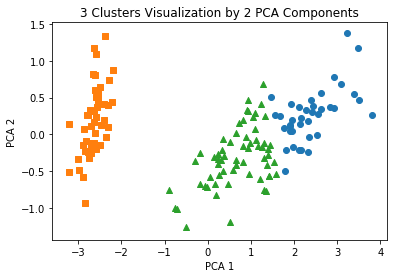

In [6]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


### 군집화 알고리즘 테스트를 위한 데이터 생성

* 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트하기 위해 간단한 데이터 생성기를 제공한다.
   * make_blobs() & make_classification()
      * 위 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터셋을 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.
      * 큰 차이는 없지만, make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있고, make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있다. 
      * 위 두 API 모두 분류용으로도 테스트 데이터 생성이 가능하다.
   * make_circle() & make_moon()
      * 중심 기반의 군집화로 해결하기 어려운 데이터셋을 만드는 데 사용된다.
   
   
* make_blobs()
   * 호출하면 피처 데이터셋과 타깃 데이터셋이 튜플로 반환된다.
   * n_samples: 생성할 총 데이터가 개수 (디폴트 100개)
   * n_features: 데이터 피처 개수
   * centers: `int`로 설정하면 군집의 개수를 나타내고, `ndarray`로 설정하면 개별 군집 중심점의 좌표를 의미한다.
   * cluster_std: 생성될 군집 데이터의 표준편차를 의미한다. `float`으로 표현하면 군집 내에서 데이터가 해당 값의 표준편차를 가지게 되고, `ndarray`로 표현하면 n개의 군집에 대한 표준편차들을 의미한다.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


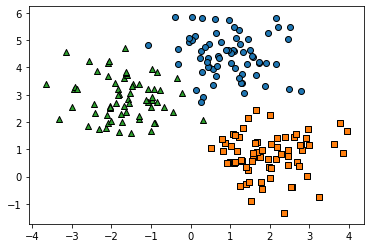

In [9]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

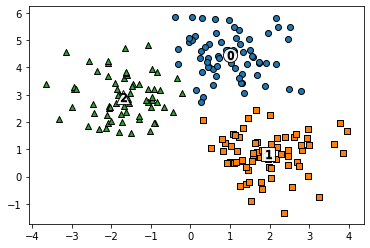

In [10]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


* make_blobs()는 cluster_std 파라미터로 데이터의 분포도를 조절한다.
* 다음 그림은 cluster_std가 0.4, 0.8, 1.2, 1.6일 때의 데이터를 시각화한 것이다.

<img src="./images/pic_7_2.png" width="90%" height="90%">

<div id='7.2.'/>

## 7.2. 군집 평가(Cluster Evaluation)

* 앞의 iris 데이터셋의 경우 결괏값에 품종을 뜻하는 타깃 레이블이 있었고, 군집화 결과를 이 레이블과 비교해 군집화가 얼마나 효율적으로 됐는지 짐작했다.
* 하지만, 대부분의 군집화 데이터셋은 이렇게 비교할 만한 타깃 레이블을 가지고 있지 않다. (그래서 비지도 학습을 하는 것이다)
* 군집화(clustering)는 분류(classification)와 다른 특성이 있다.
   * 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 
   * 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 
   * 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.
* 그렇다면 군집화가 효율적으로 잘 되었는지 평가할 수 있는 지표는 어떤 것들이 있을까? (학습 데이터가 없을 때를 가정)
* 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기 어렵다. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법은 실루엣 분석이다.

### 실루엣 분석 개요

* 군집화 평가 방법으로 실루엣 분석(sihouette analyssi)이 있다.
* 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.
* 효율적으로 잘 분리됐다는 의미는 다른 군집과의 거리는 떠러져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다.
* 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.


* 실루엣 분석은 실루엣 계수(sihouette coefficient)를 기반으로 한다.
* 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다.
* 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군지화돼 있고, 다른 군집에 있는 데이터와는 얼마나 분리돼 있는지를 나타내는 지표이다.

<img src="./images/pic_7_3.png" width="80%" height="80%">

* 특정 데이터 포인트의 실루엣 계수 값은 다음을 기반으로 계산된다.
   * 해당 데이터 포인트와 '같은' 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i)
   * 해당 데이터 포인트와 '다른' 군집 중 가장 가까운 군집와의 평균 거리 b(i)
* 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이고, 이 값을 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눈다.
* 실루엣 계수는 -1에서 1 사이의 값을 가지고, 
   * 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 
   * 0과 가까울수록 군처의 군집과 가까워진다는 것이다.
   * 음수 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.
   
<img src="./images/pic_7_4.png" width="30%" height="30%">

* 사이킷런은 이러한 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.
   * sklearn.metrics.sihouette_samples(X, labels, metric='euclidean', `**kwds`)
      * 인자로 X feature 데이터셋과 각 피처 데이터셋이 속한 군집 레이블 값인 labels 데이터를 입력해주면, 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.
   * sklearn.metrics.sihouette_score(X, labels, metric='euclidean', sample_size=None, `**kwds`)
      * 전체 데이터의 실루엣 계수 값의 평균을 반환한다.
      * 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있다. (하지만, 무조건적으로 이 값이 높다고 군집화가 잘 됐다고는 볼 수 없다)
      
      
* 좋은 군집화가 되려면 다음 기준을 만족해야 한다.
   * 전체 실루엣 계수의 평균값은 0 ~ 1 사이의 값을 가지고, 1에 가까울수록 좋다.
   * 전체 실루엣 계수의 평균값을 기준으로 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. (만약, 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다)

### iris 데이터셋을 이용한 군집 평가

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(10)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [4]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

* 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없다.
* 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도, 전체 평균은 높아질 수 있기 때문이다.
* 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에, K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있다.

#### 사이킷런 실루엣 시각화 예제

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

<img src="./images/pic_s_1.png" width="80%" height="80%">

* 주어진 데이터에서 군집의 개수를 2개로 정했을 때이다.
* 평균 실루엣 계수, 즉 silhouette_score는 약 0.704로 매우 높게 측정되었다. (빨간색 점선)
* 하지만, 이렇게 2개로 군집화하는 것이 최적의 방법일까?
* 왼쪽 부분은 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타내었다.
* 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집의 경우는 평균보다 적은 데이터 값이 매우 많다.
* 오른쪽 그림으로 그 이유를 보충해서 설명할 수 있다.
   * 1번 군집은 0번 군집과 멀리 떨어져 있고, 내부 데이터끼리도 잘 뭉쳐 있다.
   * 0번 군집은 내부 데이터끼리 많이 떨어져 있다.
   
<img src="./images/pic_s_2.png" width="80%" height="80%">

* 위 그림은 3개의 군집을 가지는 경우이다.
* 0번의 경우 모든 평균 실루엣 계수보다 낮다.
   * 오른쪽 그림을 보면 0번의 경우 내부 데이터 간의 거리도 멀지만, 2번 군집과도 가깝게 위치하고 있기 때문이다.
   
<img src="./images/pic_s_3.png" width="80%" height="80%">

* 위 그림은 4개의 군집을 가지는 경우다.
* 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치하고 있다.
* 따라서, 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만, 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있다.

<img src="./images/pic_s_4.png" width="80%" height="80%">

* 위의 6개의 경우는 4개의 경우와 비슷하게 개별 군집의 실루엣 계수 값이 균일하지만, 전체 평균 실루엣 계수 값이 작다.

#### 사이킷런 실루엣 시각화 예제 커스터마이징

* 위 예제 소스 코드에서 군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수로 만들어 이를 시각화해보자.
* 아래 vosualize_silhouette 함수는 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 개별 군집별 평균 실루엣 계수 값을 시각화해서 군집의 개수를 정하는 데 도움을 준다.

In [5]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

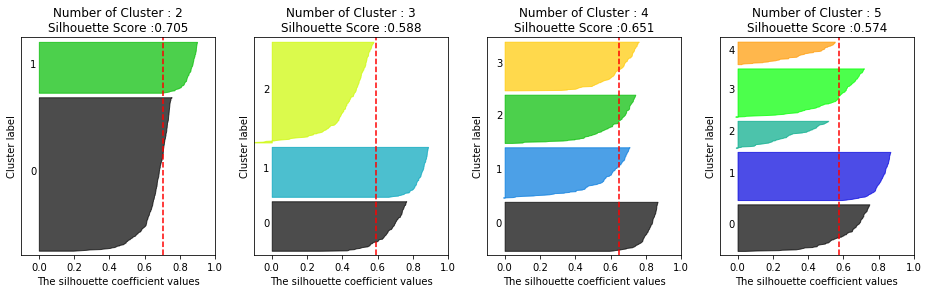

In [6]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

* 위의 경우는 4개의 군집일 때 가장 최적이 됨을 알 수 있다.

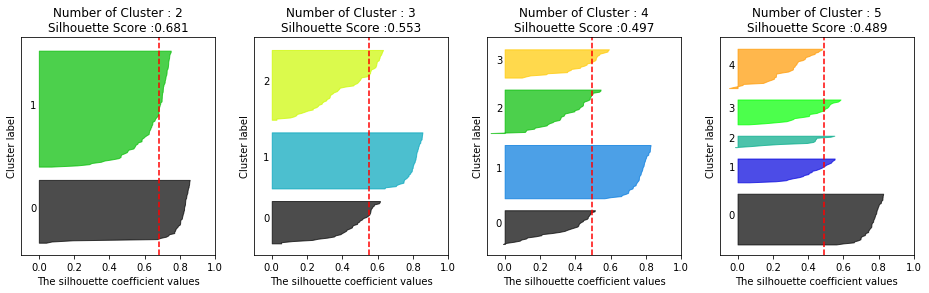

In [7]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

* 위의 경우는 2개의 군집 개수가 적당해 보인다.

* 실루엣 계수를 통한 K-평균 군집 평가 방법은 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다.
* 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 수행할 경우 메모리 부족 에러가 발생할 수도 있다.
* 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 한다.

<div id='7.3.'/>

## 7.3. 평균 이동(Mean Shift)

* 평균 이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다.
* K-평균은 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.
* 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다.


* 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)을 이용한다.
* 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정한다.
* 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용한다.


* 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동한다.
* 이를 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. (즉, KDE 함수 출력 값이 업데이트되는 좌표 값)
* 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.


<img src="./images/pic_7_5.png" width="90%" height="90%">

* (중요) 전체 데이터를 대상으로 KDE를 실시하고, 특정 반경 내의 데이터를 대상으로 KDE 기반의 Mean Shift 알고리즘을 적용한다.
* KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다.
* 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다.
   * 확률 밀도 함수 PDF(Probability Density Function)는 확률 변수의 분포를 나타내는 함수로, 정규분포, 감마분포, t-분포 등의 함수가 있다.
   * 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(정규분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있다.
* KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 PDF를 추정하고, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다.

<img src="./images/pic_7_7.png" width="90%" height="90%">

* KDE는 다음과 같은 커널 함수식으로 표현된다. (K: 커널함수, x: 확률 변숫값, xi: 관측값, h: 대역폭)

<img src="./images/pic_7_6.png" width="70%" height="70%">

* 대역폭 h는 KDE의 부드러움/뾰족한 형태의 정도를 정의한다. (다음 그림 참고)
* 이 h를 어떻게 설정하느냐에 따라 PDF 성능을 크게 좌우할 수 있다. 
* 작은 h 값은 좁고 뾰족한 KDE를 가지고, 이는 변동성이 큰 방식으로 PDF를 추정하므로 과적합(overfitting)하기 쉽다.
* 큰 h 값은 과도하게 스무딩된 KDE를 가지고, 이는 지나치게 단순화된 방삭으로 PDF를 추정하며 과소적합(underfitting)하기 쉽다.
* 적절한 KDE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 주용하다.

<img src="./images/pic_7_8.png" width="60%" height="60%">

* 일반적으로 평균 이동 군집화는 대역폭이 클수록 적은 수의 군집 중심점을 가지고, 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.
* 평균 이동 군집화는 군집의 개수를 지정하지 않고, 오직 대역폭의 크기에 따라 군집화를 수행한다.
* 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공한다. (bandwidth 파라미터 참고)
* 대역폭 크기 설정이 군집화의 품질에 큰 영향을 주므로 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth 함수를 제공한다.

참고

* https://www.geeksforgeeks.org/ml-mean-shift-clustering/
* http://campar.in.tum.de/twiki/pub/Chair/TeachingWs12TDCV/mean_shift.pdf

### 평균 이동 개요

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [9]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


* bandwidth를 0.8로 하니 6개의 군집 개수가 지정되었고, 1.0으로 하니 3개의 군집 개수가 정의되었다.

In [10]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


* 최적의 bandwidth 값을 estimate_bandwidth 함수를 통해 알아내자.

In [11]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


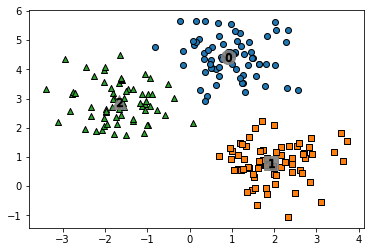

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

* 타겟 값과 군집 레이블 값이 일대일로 잘 매칭되었다.

In [13]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


### 평균 이동 정리

* 평균 이동의 장점은 데이터셋의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다.
* 이상치의 영향력도 크지 않고, 미리 군집의 개수를 정할 필요도 없다.
* 하지만, 알고리즘 수행 시간이 오래 걸리고 무엇보다도 bandwidth 크기에 따른 군집화 영향도가 매우 크다.

<div id='7.4.'/>

## 7.4. GMM(Gaussian Mixture Model)

* GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다.
* 군집화를 수행하려는 실제 데이터 분포도가 다음과 같다면 이 데이터셋이 정규분포 A, B, C가 합쳐서 된 데이터 분포도임을 알 수 있다.

<img src="./images/pic_7_9.png" width="50%" height="50%">

* 전체 데이터셋은 서로 다른 정규 분포 형태를 가진  여러 가지 확률 분포 곡선으로 구성될 수 있으며, GMM은 이러한 서로 다른 정규 분포에 기반해 군집화를 수행한다.
* 예를 들어, 1000개의 데이터셋이 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다.
* 이와 같은 방식을 GMM에서는 모수 추정이라 한다.

<img src="./images/pic_7_10.png" width="70%" height="70%">

* 모수 추정은 대표적으로 다음과 같은 2가지를 추정하는 것이다.
   * 개별 정규 분포의 평균과 분산
   * 각 데이터가 어떤 정규 분포에 해당되는지의 확률
* 모수 추정을 위한 GMM은 EM(Expectation and Maximization) 방법을 적용한다.
* GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 사이킷런은 GaussianMixture 클래스를 지원한다.

### GMM을 이용한 iris 데이터셋 군집화

* GMM은 확률 기반 군집화이고, K-평균은 거리 기반 군집화이다. 
* iris 데이터셋으로 양쪽 방식을 비교해보자.

In [14]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

* GaussianMixture 객에츼 가장 중요한 파라미터는 n_components이다.
* 이는 gaussian mixture 모델의 총 개수이다. (K-평균에서 n_clusters와 성격이 비슷)

In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


* 어떤 알고리즘이 더 뛰어나다는 의미가 아니라 iris 데이터셋이 GMM 군집화에 더 효과적이라는 의미이다.
* K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식으로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.

### GMM과 K-평균 비교

* K-Means는 원형의 범위에서 군집화를 수행한다. 데이터셋이 원형의 범위를 가질수록 K-Means의 군집화 효율은 더 높아진다.
* 하지만, 데이터가 원형의 범위로 퍼져 있지 않는 경우ㅡ에는 어떨까?
* 즉, K-Means는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다.


* 다음 visualize_cluster_plot 함수를 통해 시각화를 진행해보자.
   * clusterobj: 사이킷런 군집 수행 객체. KMeans나 GaussianMixture의 fit()과 predict()로 군집화를 완료한 객체. 만약, 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력
   * dataframe: 피처 데이터셋과 label 값을 가진 DataFrame
   * label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, make_blobs() 결과 시각화일 경우는 dataframe 내의 target 컬럼 명
   * iscenter: 사이킷런 cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [17]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

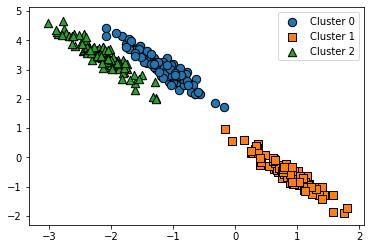

In [18]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

* K-Means로 군집화 수행

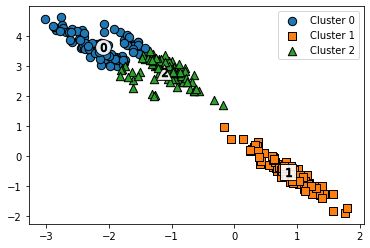

In [19]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

* GMM으로 군집화 수행
* GMM은 K-Means와 다르게 군집의 중심 좌표를 구할 수 없음.

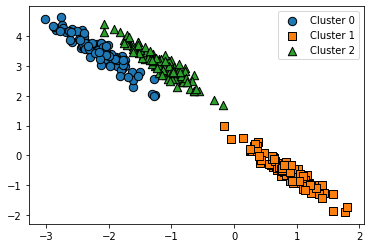

In [20]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

* 비교 - 비선형 분포에서는 GMM이 뛰어나다. 단, 수행 시간은 오래 걸린다.

In [21]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


<div id='7.5.'/>

## 7.5. DBSCAN (Density Based Spatial Clustering of Applications with Noise)

* DBSCAN은 간단하고 직관적인 알고리즘임에도 불구하고 기하학적인 데이터 분포를 효과적으로 군집화를 할 수 있다.
* 다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터셋을 군집화한다고 가정할 때, 앞에서 소개한 K-평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기 어렵다.
* DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반으로 한 알고리즘을 가지고 있어서 복잡한 기하학적인 데이터 분포에 대해서도 군집화를 잘 수행한다.

<img src="./images/pic_7_11.png" width="50%" height="50%">

* DBSCAN을 구성하는 가장 중요한 파라미터
   * 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이다.
   * 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.
* 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.
   * 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라 한다.
   * 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 한다.
   * 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라 한다.
   * 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않고, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라 한다.
   
   
* P1에서 P12까지 12개의 데이터셋에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 이해해보자. (특정 입실론 반경 내에 포함될 최소 데이터셋을 6개(자기 자신의 데이터를 포함)로 가정)

<img src="./images/pic_p_1.png" width="60%" height="60%">

1. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신 포함)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 Core 포인트이다.

<img src="./images/pic_p_2.png" width="60%" height="60%">

2. 다음으로 P2 데이터 포인트를 살펴보자. P2 역시 반경 내에 6개의 데이터를 가지므로 Core 포인트이다.

<img src="./images/pic_p_3.png" width="60%" height="60%">

3. Core 포인트 P1의 이웃 데이터 포인트 P2 역시 Core 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능하다.

<img src="./images/pic_p_4.png" width="60%" height="60%">

4. 특정 core 포인트에서 직접 접근이 가능한 다른 core 포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식이다.

<img src="./images/pic_p_5.png" width="60%" height="60%">

5. P3의 경우 반경 내에 포함되는 이웃 데이터는 P2, P4로 2개이므로 군집으로 구분할 수 있는 core 포인트가 될 수 없다. 하지만, 이웃 데이터 중에 core 포인트 P2를 가진다. 이처럼 자신은 core 포인트가 아니지만, 이웃 데이터로 core 포인트를 가지고 있는 데이터를 경계 포인트라 한다. 경계 포인트는 군집의 외곽을 형성한다.

<img src="./images/pic_p_6.png" width="60%" height="60%">

6. P5는 반경 내에 최소 데이터를 가지고 있지도 않고, core 포인트 또한 이웃 데이터로 가지고 있지 않는다. 이러한 데이터를 잡음 포인트라 한다.



* 정리하면, DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 core 포인트를 연결하면서 군집화를 구성하는 방식이다.
* 사이킷런은 DBSCAN 클래스를 지원한다. 다음과 같은 주요 파라미터를 가진다.
   * eps: 입실론 주변 영역의 반경을 의미
   * min_samples: core 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수를 의미. (자신의 데이터를 포함. 위에서 설명한 min points + 1)

### DBSCAN 적용하기 - iris 데이터셋

In [ ]:
# ### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
# def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
#     if iscenter :
#         centers = clusterobj.cluster_centers_
        
#     unique_labels = np.unique(dataframe[label_name].values)
#     markers=['o', 's', '^', 'x', '*']
#     isNoise=False

#     for label in unique_labels:
#         label_cluster = dataframe[dataframe[label_name]==label]
#         if label == -1:
#             cluster_legend = 'Noise'
#             isNoise=True
#         else :
#             cluster_legend = 'Cluster '+str(label)
        
#         plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
#                     edgecolor='k', marker=markers[label], label=cluster_legend)
        
#         if iscenter:
#             center_x_y = centers[label]
#             plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
#                         alpha=0.9, edgecolor='k', marker=markers[label])
#             plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
#                         edgecolor='k', marker='$%d$' % label)
#     if isNoise:
#         legend_loc='upper center'
#     else: legend_loc='upper right'
    
#     plt.legend(loc=legend_loc)
#     plt.show()

In [22]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

* 군집 레이블이 -1인 겻은 노이즈에 속하는 군집을 의미한다.
* 타겟 군집은 3개인데, DBSCAN의 군집이 2개가 되었다고 군집화 효율이 떨어진다는 의미는 아니다. 특히, iris 데이터셋은 군집을 3개로 하는 것보다는 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있다.
* DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요하다.
   * eps 값이 클수록 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다.
   * min_samples가 클수록 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다.

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


* PCA로 DBSCAN의 군집화 데이터셋을 2차원 평면으로 표현해보자.

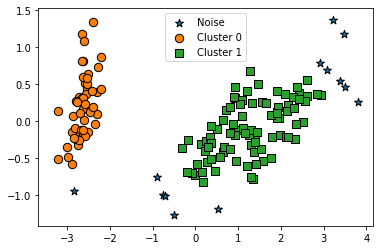

In [25]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

* eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


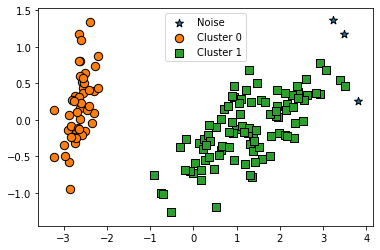

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

* eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘리면 노이즈 데이터 수가 증가한다.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


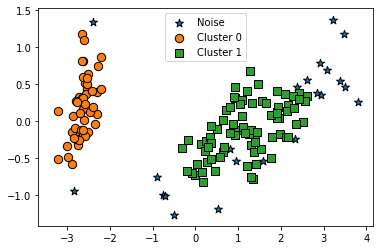

In [27]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles( ) 데이터셋

* make_circles( ) 함수
   * 오직 2개의 피처만 생성하므로 별도의 피처 개수를 지정할 필요가 없다.
   * noise 파라미터는 노이즈 데이터셋의 비율이다.
   * factor는 외부 원과 내부 원의 scale 비율이다.

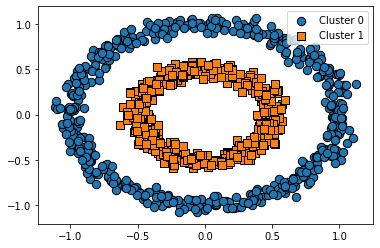

In [28]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

* K-평균 (거리 기반 군집화)

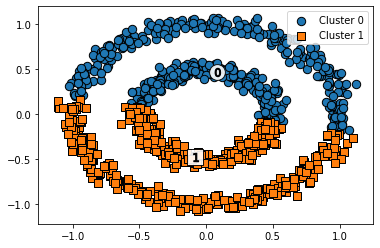

In [29]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

* GMM

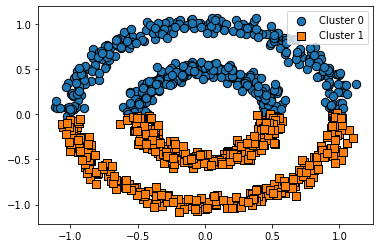

In [30]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

* DBSCAN

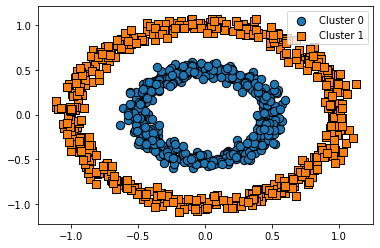

In [31]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

<div id='7.6.'/>

## 7.6. 군집화 실습 - 고객 세그먼테이션

* 기본적인 고객 분석 요소인 RFM 기법을 이용
   * Recency (R): 가장 최근 상품 구입일에서 오늘까지의 기간
   * Frequency (F): 상품 구매 횟수
   * Monetary value (M): 총 구매 금액

### 데이터 로딩 & 클렌징

In [33]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [34]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* 사전 정제 작업
   * Null 데이터 제거: CustomerID에 null인 데이터가 많다. 그리고 특별히 ID는 필요없으므로 삭제하자. 
   * 오류 데이터 삭제: Quantity 또는 UnitPrice가 0보다 작으면 안된다. (사실, 0이하의 Quantity는 오류 데이터가 아닌 반환을 뜻하는 값. 이 경우 InvoiceNo의 앞자리는 'C'로 됨. 여기서는 그냥 삭제)

In [35]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

* 주요 주문 고객을 대다수를 차지하는 영국으로만 필터링하자.

In [37]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


### RFM 기반 데이터 가공

* UnitPrice와 Quantity를 곱해서 주문 금액 데이터를 만들자.
* 더 편리한 식별성을 위해 CustomerNo을 float형에서 int형으로 변경하자.

In [38]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

* 해당 온라인 판매 데이터는 주문 횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가진다. (개인 고객의 주문과 소매점의 주문이 함께 포함돼 있기 때문)

In [39]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


* 주어진 온라인 판매 데이터셋은 전형적인 판매 데이터셋과 같이 주문번호(InvoiceNo) + 상품코드(StockCode) 레벨의 식별자로 되어 있다.
* 주문번호(InvoiceNo) + 상품코드(StockCode)로 Group by를 수행하면 거의 1에 가깝게 유일한 식별자 레벨이 됨을 알 수 있다.

In [40]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

* RFM 기반의 고객 세그먼테이션은 고객 레벨로 세그멘테이션을 수행해야 한다.
* 주문번호+상품코드 기준의 데이터를 고객 기준의 Recency, Freqeuncy, monetary value 데이터로 변경하자.
* 이를 위해서 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by 해야 한다.

In [41]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


* Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 오늘 날짜를 기준으로 가장 최근 주문 일자를 뺀 날짜이다.
* 여기서 주의할 점은 오늘 날짜를 현재 날짜로 해서는 안된다는 점이다.
* 2010년12월1일 ~ 2011년12월9일까지의 데이터이다. 오늘 날짜는 2011년 12월9일에서 하루 더한 2011년 12월10일로 하자.

In [42]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션

* 온라인 판매 데이터셋은 소매업체의 대규모 주문을 포함하고 있다. 
* 이들은 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 가지며 이로 인해 매우 왜곡된 데이터 분포도를 가진다.

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

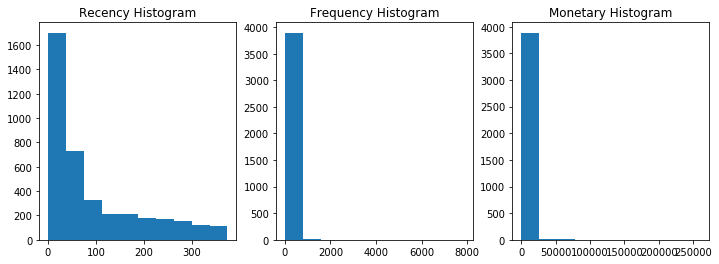

In [43]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [44]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


* 왜곡 정도가 매우 높은 데이터셋에 K-평균 군집화를 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다.
* StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-평균을 수행해보자.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [46]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

* 군집이 2개일 경우 0번 군집과 1번 군집이 너무 개괄적으로 군집화되었다.
* 군집이 3개 이상일 때부터는 데이터셋의 개수가 너무 작은 군집이 만들어진다. 이 군집에 속한 데이터는 개수가 작을뿐더러 실루엣 계수 역시 작다.
* 이러한 특이한 데이터셋을 분리하고 도출하는 것이 군집화의 목표이기도 하다.
* 하지만, 이 정도로 크게 왜곡된 데이터셋의 도출은 굳이 군집화를 이용하지 않고도 간단한 데이터 분석만으로 충분히 가능하다.
* 이처럼 지나치게 왜곡된 데이터셋은 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출한다.

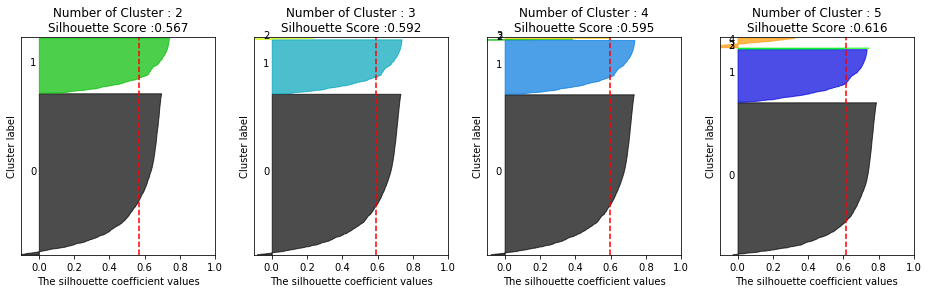

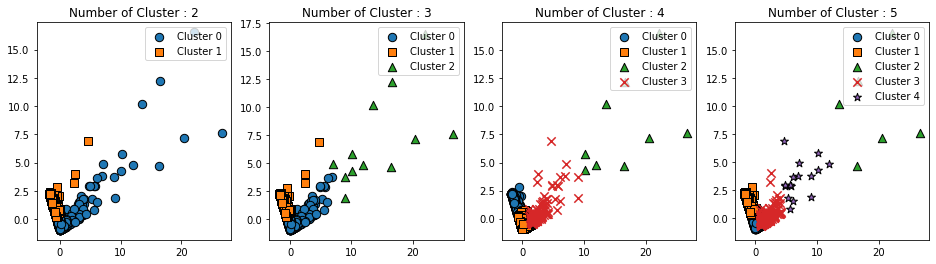

In [47]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

* 데이터셋의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(log)를 적용하는 로그 변환이다.
* K-평균 알고리즘에 로그 변환을 실시하자.

In [48]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.303


* 실루엣 스코어는 로그 변환하기 전보다 떨어진다. 
* 하지만, 실루엣 스코어의 절대치가 중요한 것은 아니고, 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다.
* 실루엣 스코어는 로그 변환하기 전보다 떨어지지만, 앞의 경우보다 더 균일하게 군집화가 되었음을 알 수 있다.

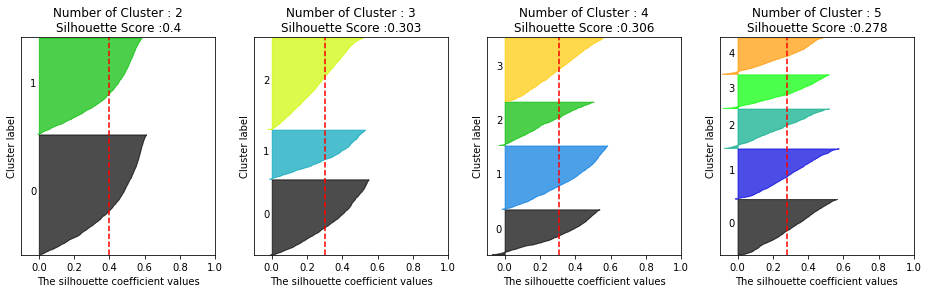

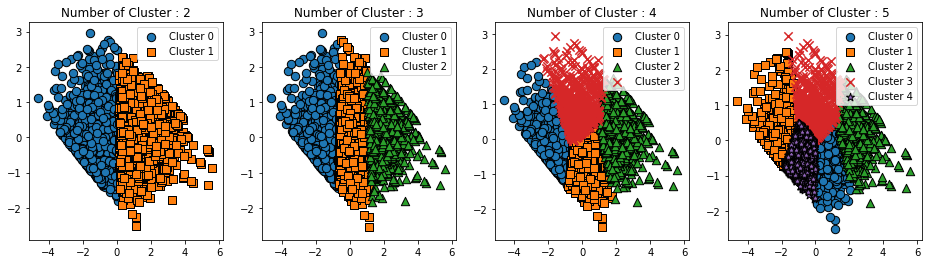

In [49]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

<div id='7.7.'/>

## 7.7. 정리

* K-평균
   * 거리 기반으로 군집 중심점을 이동시키면서 군집화 수행
   * 매우 쉽고 직관적인 알고리즘으로 많이 활용되지만, 복잡한 구조를 가지는 데이터셋에 적용하기엔 한계가 있어 군집의 개수를 최적화하기 어려움.
* 평균 이동(Mean Shift)
   * K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행한다.
   * 일반 업무 기반의 정형 데이터셋보다는 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 성능을 가진다.
* GMM
   * 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포의 모델을 섞어서 생성된 모델로 가정하고 이를 기반으로 군집화를 수행합니다.
   * GMM은 K-평균보다 유연하게 다양한 데이터셋에 잘 적용될 수 있지만, 수행 시간은 더 오래 걸린다.
* DBSCAN
   * 밀도 기반 군집화의 대표적인 알고리즘이다.
   * 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심, 이웃, 경계, 잡음 포인트로 구분하고, 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 한다.
   * 간단하고 직관적인 알고리즘이지만 기하학적인 데이터 분포에도 효과적인 군집화가 가능하다.